In [1]:
# autoencoder and cnn

In [2]:
# import tensorflow for neural networks
import tensorflow as tf

tf.__version__

'2.13.0'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import TimeDistributed, Dense, RepeatVector, Conv1D, LSTM, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model, load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score
from keras.layers import Input, Conv2D, MaxPooling1D, Reshape, Conv1D, MaxPooling2D
from keras.models import Model
import seaborn as sns
import pickle
from scipy import stats
from pylab import rcParams
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "abnormality"]

In [4]:
# reading out the first dataset

data = pd.read_csv("main_data_iot")


In [5]:
df = data.copy()

df

,Unnamed: 0,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,0.0,...,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0.0,0.0,...,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,...,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,...,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0.0,1.0,...,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15562187,15562187,0.000000,54.00,6.00,64.00,3.008840,3.008840,0.0,0.0,1.0,...,0.000000,54.00,8.309441e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SYN_Flood
15562188,15562188,0.000000,54.00,6.00,64.00,14.427165,14.427165,0.0,0.0,0.0,...,0.000000,54.00,8.303340e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
15562189,15562189,0.000000,0.00,0.99,63.36,50.514004,50.514004,0.0,0.0,0.0,...,1.072258,42.18,8.314962e+07,9.5,9.215048,1.517764,6.492759,0.19,141.55,DDoS-ICMP_Flood
15562190,15562190,0.011040,2.46,46.59,65.91,2.446356,2.446356,0.0,0.0,0.0,...,7.760271,587.31,8.369406e+07,9.5,34.351316,11.010178,868.181562,0.07,141.55,Mirai-greeth_flood


In [6]:
df.shape

(15562192, 48)

In [6]:
df["label"].value_counts()

label
DDoS-ICMP_Flood            2400276
DDoS-UDP_Flood             1805837
DDoS-TCP_Flood             1499936
DDoS-PSHACK_Flood          1363802
DDoS-SYN_Flood             1353251
DDoS-RSTFINFlood           1348448
DDoS-SynonymousIP_Flood    1197800
DoS-UDP_Flood              1106312
DoS-TCP_Flood               891337
DoS-SYN_Flood               675086
BenignTraffic               366083
Mirai-greeth_flood          330149
Mirai-udpplain              296898
Mirai-greip_flood           250824
DDoS-ICMP_Fragmentation     150396
MITM-ArpSpoofing            102676
DDoS-UDP_Fragmentation       96175
DDoS-ACK_Fragmentation       95543
DNS_Spoofing                 59740
Recon-HostDiscovery          44650
Recon-OSScan                 32460
Recon-PortScan               27346
DoS-HTTP_Flood               23901
VulnerabilityScan            12456
DDoS-HTTP_Flood               9586
DDoS-SlowLoris                7847
DictionaryBruteForce          4343
BrowserHijacking              1963
CommandInjecti

In [7]:
df = df.drop("Unnamed: 0", axis = 1)

In [8]:
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0.0,0.0,0.0,...,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0.0,1.0,0.0,...,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


In [8]:
le = LabelEncoder()

mapped = le.fit_transform(df["label"].unique())
mapped_df = pd.DataFrame([np.array(df["label"].unique()), mapped]).T
labels_dict = dict(zip(mapped_df[0], mapped_df[1]))
labels_dict

{'DDoS-RSTFINFlood': 9,
 'DoS-TCP_Flood': 20,
 'DDoS-ICMP_Flood': 6,
 'DoS-UDP_Flood': 21,
 'DoS-SYN_Flood': 19,
 'Mirai-greeth_flood': 23,
 'DDoS-SynonymousIP_Flood': 12,
 'Mirai-udpplain': 25,
 'DDoS-SYN_Flood': 10,
 'DDoS-PSHACK_Flood': 8,
 'DDoS-TCP_Flood': 13,
 'DDoS-UDP_Flood': 14,
 'BenignTraffic': 1,
 'MITM-ArpSpoofing': 22,
 'DDoS-ACK_Fragmentation': 4,
 'Mirai-greip_flood': 24,
 'DoS-HTTP_Flood': 18,
 'DDoS-ICMP_Fragmentation': 7,
 'Recon-PortScan': 29,
 'DNS_Spoofing': 16,
 'DDoS-UDP_Fragmentation': 15,
 'Recon-OSScan': 27,
 'XSS': 33,
 'DDoS-HTTP_Flood': 5,
 'Recon-HostDiscovery': 26,
 'CommandInjection': 3,
 'VulnerabilityScan': 32,
 'DDoS-SlowLoris': 11,
 'Backdoor_Malware': 0,
 'BrowserHijacking': 2,
 'DictionaryBruteForce': 17,
 'SqlInjection': 30,
 'Recon-PingSweep': 28,
 'Uploading_Attack': 31}

In [10]:
df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

In [9]:
df_new = df.drop(['fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'Header_Length',
       'Srate', 'Drate','IRC', 'Std'], axis = 1)

In [10]:
df_new["label"] = le.fit_transform(df_new["label"])


In [11]:
x = df_new.drop("label", axis = 1)
y = df_new["label"]

In [22]:
normal = df_new[df_new.label == 1]

In [14]:
print(f"shape for normal data is: {normal.shape}")

shape for normal data is: (366083, 35)


In [15]:
normal.head(10)

,flow_duration,Protocol Type,Duration,Rate,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,...,AVG,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
22,37.887028,9.3,63.5,34.048221,0.0,0.0,0.0,58.6,1610.8,0.0,...,356.406944,817.5,5.235219e-03,5.5,24.333355,469.692075,2.092362e+05,0.9,38.5,1
54,48.272384,10.4,97.8,39966.184035,0.0,0.4,0.0,312.5,677.1,0.0,...,661.318481,636.4,1.665200e+08,13.5,36.393289,983.968335,4.842123e+05,1.0,244.6,1
70,48.095663,8.8,137.7,13.947935,0.0,0.8,0.0,137.9,334.7,0.0,...,1177.511230,919.3,2.724581e-02,5.5,47.214170,1841.471789,2.063959e+06,0.9,38.5,1
78,46.342407,4.8,168.3,34.223130,0.0,1.2,0.0,58.8,1243.2,0.0,...,65.813333,64.8,3.804951e-02,5.5,11.472815,0.606078,9.315556e-01,0.2,38.5,1
86,88.807750,7.1,63.6,61.443831,0.0,1.6,0.0,250.3,5158.3,0.0,...,1469.563333,1227.3,1.833391e-03,5.5,54.184531,144.162858,5.276998e+04,0.2,38.5,1
167,28.616804,6.0,64.0,69.032858,0.0,0.0,0.0,75.0,1975.5,0.0,...,1376.164448,1948.4,1.665261e+08,13.5,52.298245,739.051521,2.781231e+05,1.0,244.6,1
168,28.479773,9.9,93.9,19.917350,0.0,0.1,0.0,143.5,305.2,0.0,...,104.969514,135.6,1.665212e+08,13.5,14.489197,82.185960,3.567287e+03,1.0,244.6,1
209,8.447649,8.2,114.2,32.005605,0.0,1.5,0.0,24.6,595.4,0.0,...,214.175873,161.8,5.179405e-03,5.5,20.606804,161.287462,1.459342e+04,0.9,38.5,1
222,0.583307,6.0,87.6,3437.658351,0.0,0.2,0.0,270.2,2115.2,1.0,...,908.465859,1196.8,1.665177e+08,13.5,42.346824,1393.174348,9.986839e+05,1.0,244.6,1
243,1.676156,6.0,64.0,61.747029,0.0,2.0,0.0,11.0,102.5,0.0,...,1656.156825,1803.6,4.521132e-04,5.5,57.496024,403.690893,1.638946e+05,0.5,38.5,1


In [24]:
normal.reset_index(drop = True, inplace = True)

In [23]:
abnormal = df_new[df_new['label'] != 1]

In [18]:
print(f"shape for abnormal data is: {abnormal.shape}")

shape for abnormal data is: (15196109, 35)


In [19]:
abnormal.head()

,flow_duration,Protocol Type,Duration,Rate,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,...,AVG,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,6.00,64.00,0.329807,1.0,0.00,1.00,0.0,0.00,0.0,...,54.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,9
1,0.000000,6.33,64.00,4.290556,0.0,0.00,0.00,0.0,0.00,1.0,...,54.796404,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,20
2,0.000000,1.00,64.00,33.396799,0.0,0.00,0.00,0.0,0.00,0.0,...,42.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,6
3,0.328175,17.00,64.00,4642.133010,0.0,0.00,0.00,0.0,0.00,0.0,...,50.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,21
4,0.117320,6.11,65.91,6.202211,0.0,1.01,0.04,0.0,0.02,0.0,...,67.959230,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,19


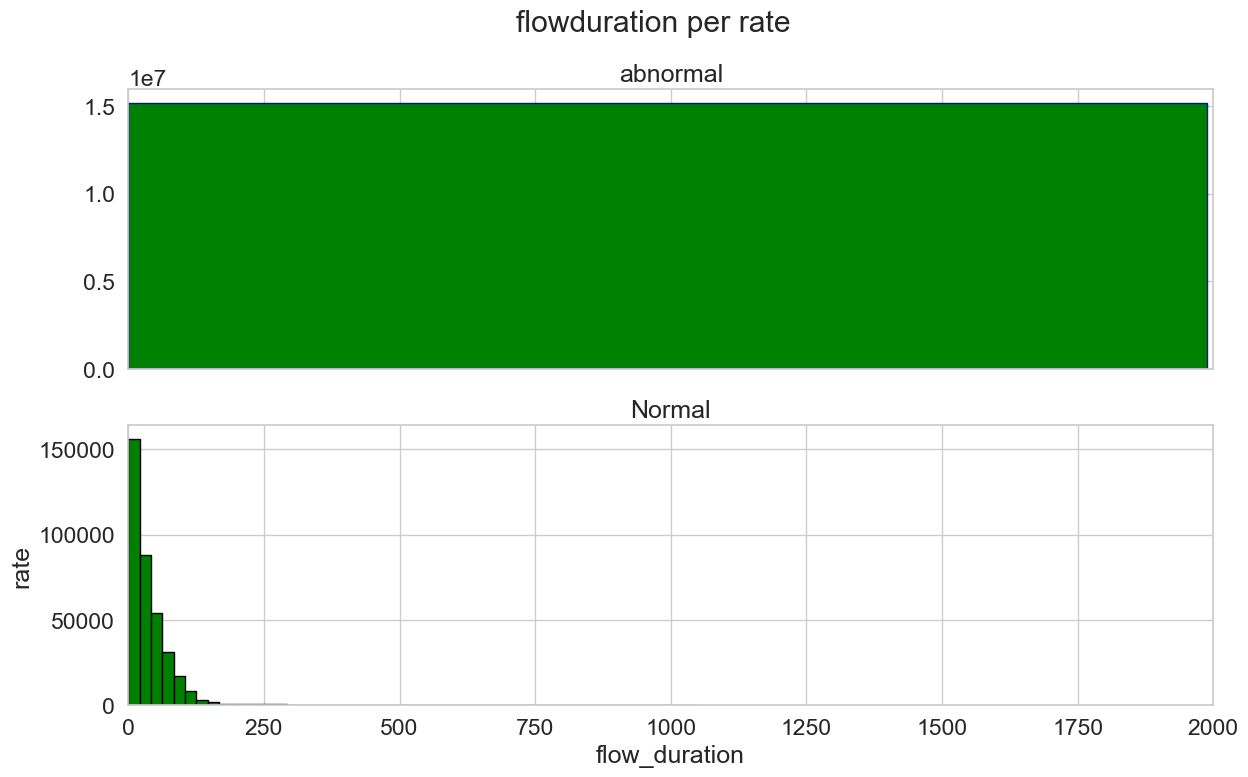

In [20]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('flowduration per rate')

bins = 50

ax1.hist(abnormal.flow_duration, bins = bins,  color=['green'], edgecolor='blue')
ax1.set_title('abnormal')

ax2.hist(normal.flow_duration, bins = bins,  color=['green'], edgecolor='black')
ax2.set_title('Normal')

plt.xlabel('flow_duration')
plt.ylabel('rate')
plt.xlim(0, 2000)

plt.show()

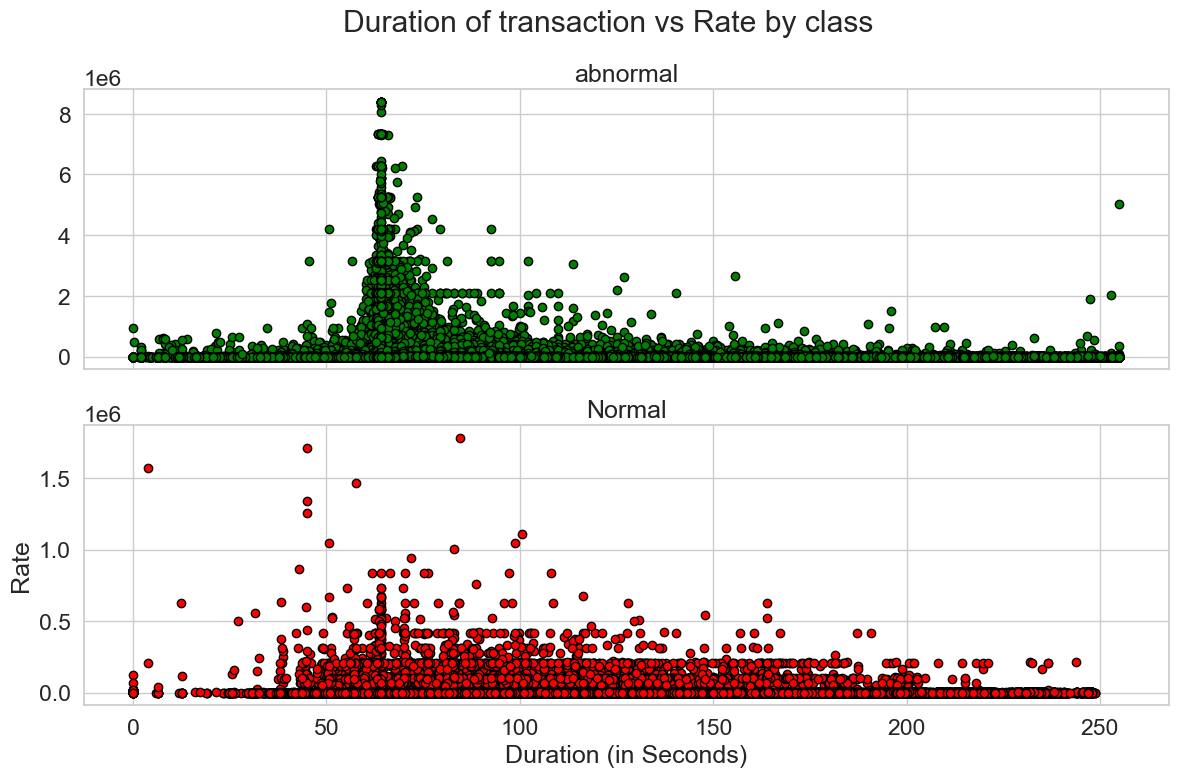

In [22]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Duration of transaction vs Rate by class')

ax1.scatter(abnormal.Duration, abnormal.Rate,  color=['green'], edgecolor='black')
ax1.set_title('abnormal')

ax2.scatter(normal.Duration, normal.Rate,  color=['red'], edgecolor='black')
ax2.set_title('Normal')

plt.xlabel('Duration (in Seconds)')
plt.ylabel('Rate')
plt.show()

In [21]:
df["label"].value_counts()

label
DDoS-ICMP_Flood            2400276
DDoS-UDP_Flood             1805837
DDoS-TCP_Flood             1499936
DDoS-PSHACK_Flood          1363802
DDoS-SYN_Flood             1353251
DDoS-RSTFINFlood           1348448
DDoS-SynonymousIP_Flood    1197800
DoS-UDP_Flood              1106312
DoS-TCP_Flood               891337
DoS-SYN_Flood               675086
BenignTraffic               366083
Mirai-greeth_flood          330149
Mirai-udpplain              296898
Mirai-greip_flood           250824
DDoS-ICMP_Fragmentation     150396
MITM-ArpSpoofing            102676
DDoS-UDP_Fragmentation       96175
DDoS-ACK_Fragmentation       95543
DNS_Spoofing                 59740
Recon-HostDiscovery          44650
Recon-OSScan                 32460
Recon-PortScan               27346
DoS-HTTP_Flood               23901
VulnerabilityScan            12456
DDoS-HTTP_Flood               9586
DDoS-SlowLoris                7847
DictionaryBruteForce          4343
BrowserHijacking              1963
CommandInjecti

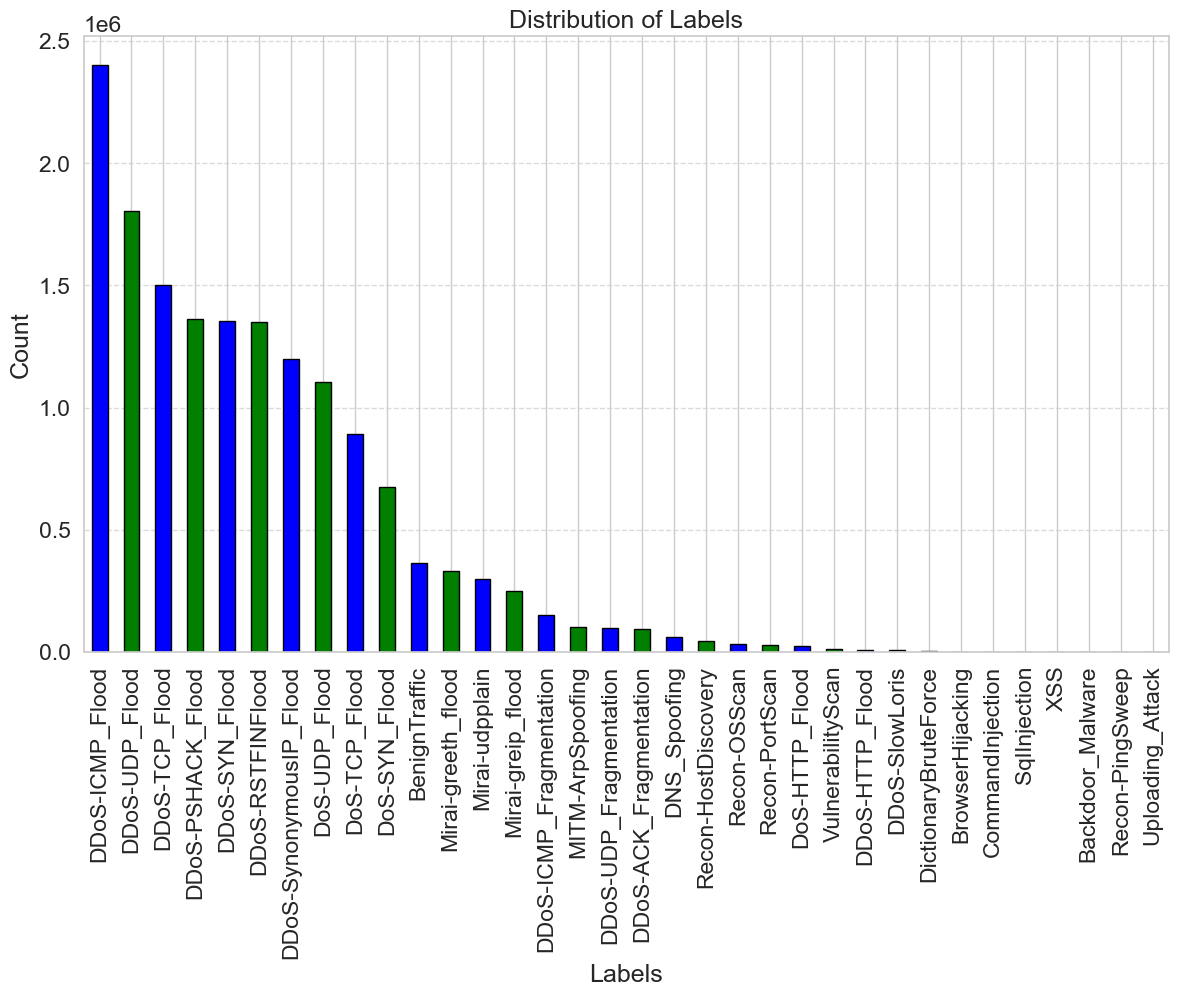

In [24]:
df["label"].value_counts().plot(kind="bar", color=['blue', 'green'], edgecolor='black')

plt.title("Distribution of Labels")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [26]:
x_normal = normal.drop("label", axis = 1)
y_normal = normal["label"]

In [27]:
x_abnormal = abnormal.drop("label", axis = 1)
y_abnormal = abnormal["label"]

In [27]:
x_normal.head()

,flow_duration,Protocol Type,Duration,Rate,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,...,Max,AVG,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,37.887028,9.3,63.5,34.048221,0.0,0.0,0.0,58.6,1610.8,0.0,...,817.5,356.406944,817.5,5.235219e-03,5.5,24.333355,469.692075,2.092362e+05,0.9,38.5
1,48.272384,10.4,97.8,39966.184035,0.0,0.4,0.0,312.5,677.1,0.0,...,1566.4,661.318481,636.4,1.665200e+08,13.5,36.393289,983.968335,4.842123e+05,1.0,244.6
2,48.095663,8.8,137.7,13.947935,0.0,0.8,0.0,137.9,334.7,0.0,...,3922.9,1177.511230,919.3,2.724581e-02,5.5,47.214170,1841.471789,2.063959e+06,0.9,38.5
3,46.342407,4.8,168.3,34.223130,0.0,1.2,0.0,58.8,1243.2,0.0,...,66.0,65.813333,64.8,3.804951e-02,5.5,11.472815,0.606078,9.315556e-01,0.2,38.5
4,88.807750,7.1,63.6,61.443831,0.0,1.6,0.0,250.3,5158.3,0.0,...,1514.0,1469.563333,1227.3,1.833391e-03,5.5,54.184531,144.162858,5.276998e+04,0.2,38.5


In [28]:
sc = StandardScaler()

x_normal = sc.fit_transform(x_normal)

In [29]:
x_abnormal = sc.transform(x_abnormal)

In [30]:
x = sc.transform(x)

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_normal, y_normal, test_size=0.2, random_state=42)

In [33]:
x_train_abnormal, x_test_abnormal, y_train_abnormal, y_test_abnormal = train_test_split(x_abnormal, y_abnormal, test_size=0.2, random_state=42)

In [31]:
y_train

202883    1
235768    1
32515     1
353711    1
190636    1
         ..
259178    1
365838    1
131932    1
146867    1
121958    1
Name: label, Length: 292866, dtype: int32

In [48]:
# Reshape the data for CNN input (assuming 1D time-series data)
input_shape = x_train.shape[1], 1
x_train = x_train.reshape(-1, *input_shape)
x_test = x_test.reshape(-1, *input_shape)

In [49]:
input_shape = x_train_abnormal.shape[1], 1
x_train_abnormal = x_train_abnormal.reshape(-1, *input_shape)
x_test_abnormal = x_test_abnormal.reshape(-1, *input_shape)

In [50]:
input_layer = Input(shape=input_shape)


conv1 = Conv1D(filters=64, kernel_size=3, activation='relu',  padding = "same")(input_layer)

pool1 = MaxPooling1D(pool_size=2)(conv1)

conv2 = Conv1D(filters=128, kernel_size=3, activation='relu')(pool1)

pool2 = MaxPooling1D(pool_size=2)(conv2)

flatten = Flatten()(pool2)

dense1 = Dense(64, activation='relu')(flatten)

output_layer = Dense(1, activation='sigmoid')(dense1)  # Binary classification (normal vs. abnormal)

model = Model(inputs=input_layer, outputs=output_layer)


In [51]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 32, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 16, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 14, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 7, 128)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 896)               0     

In [60]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ["accuracy"])


In [61]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
9153/9153 [==============================] - 235s 25ms/step - loss: 3.0585e-04 - accuracy: 0.9999 - val_loss: 1.4308e-09 - val_accuracy: 1.0000
Epoch 2/10
9153/9153 [==============================] - 206s 23ms/step - loss: 8.5881e-10 - accuracy: 1.0000 - val_loss: 4.6435e-10 - val_accuracy: 1.0000
Epoch 3/10
9153/9153 [==============================] - 204s 22ms/step - loss: 3.5917e-10 - accuracy: 1.0000 - val_loss: 2.9300e-10 - val_accuracy: 1.0000
Epoch 4/10
9153/9153 [==============================] - 204s 22ms/step - loss: 2.7693e-10 - accuracy: 1.0000 - val_loss: 2.4540e-10 - val_accuracy: 1.0000
Epoch 5/10
9153/9153 [==============================] - 203s 22ms/step - loss: 2.4361e-10 - accuracy: 1.0000 - val_loss: 2.2204e-10 - val_accuracy: 1.0000
Epoch 6/10
9153/9153 [==============================] - 204s 22ms/step - loss: 2.1879e-10 - accuracy: 1.0000 - val_loss: 2.0595e-10 - val_accuracy: 1.0000
Epoch 7/10
9153/9153 [==============================] - 204s 22ms/step

In [62]:
from tensorflow.keras.models import load_model
model.save('autoencoder_CNN(normal)_model')

INFO:tensorflow:Assets written to: autoencoder_CNN(normal)_model\assets


INFO:tensorflow:Assets written to: autoencoder_CNN(normal)_model\assets


In [66]:
def diagram(epochs, hist):
  plt.plot(epochs, hist.history["accuracy"], label = "accuracy")
  plt.plot(epochs, hist.history["val_accuracy"], label = "val_accuracy")
  plt.legend(shadow = True, loc = "lower right")
  plt.show()
  plt.plot(epochs, hist.history["loss"], label = "loss")
  plt.plot(epochs, hist.history["val_loss"], label = "val_loss")
  plt.legend(shadow = True, loc = "upper right")
  plt.show()

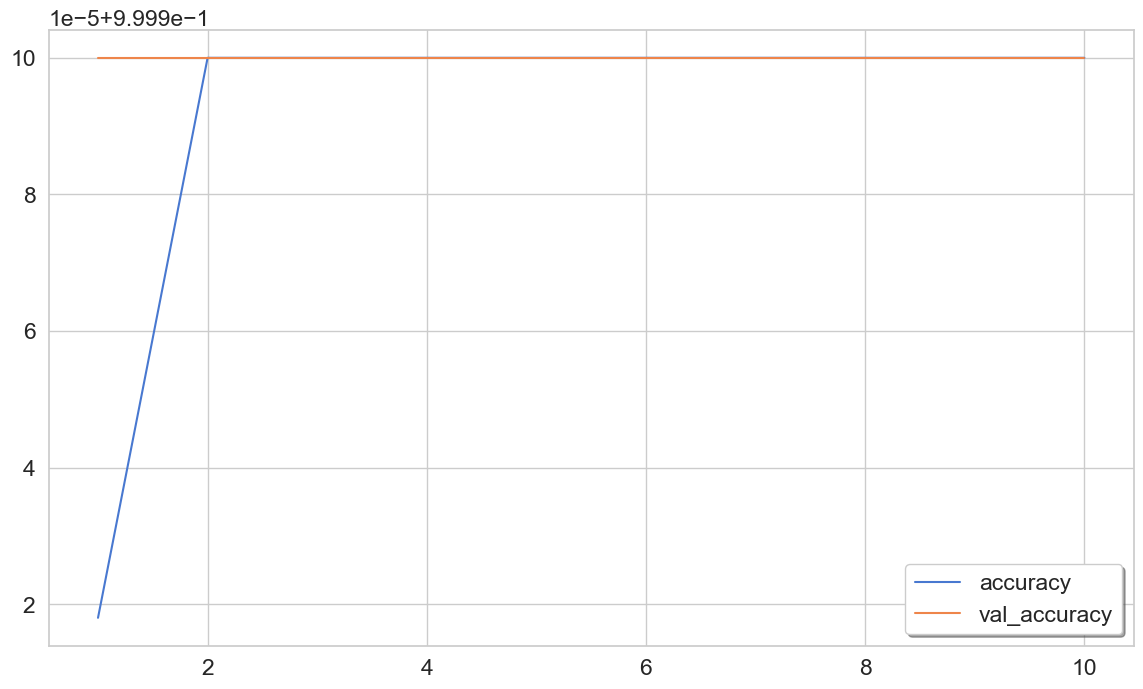

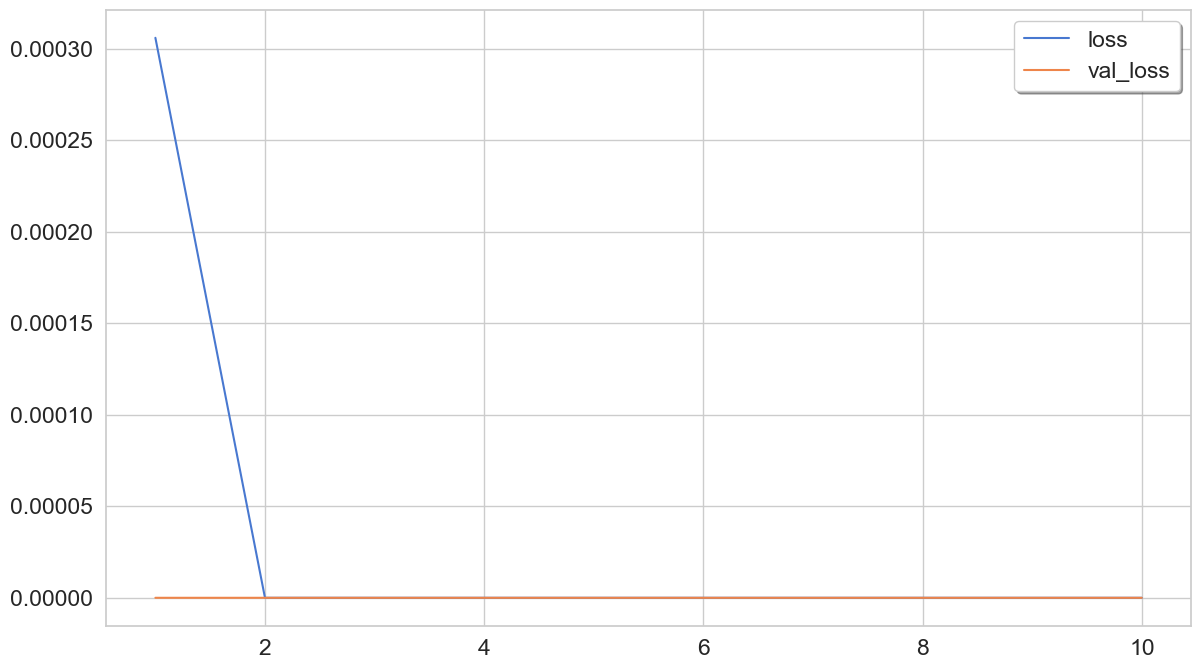

In [67]:
diagram(range(1, 11), history)

# MODEL EVALUATION AND PERFORMANCE MATRICS

In [68]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('autoencoder_CNN(normal)_model')

In [69]:
y_test_1 = loaded_model.predict(xtest)

97264/97264 [==============================] - 658s 7ms/step


In [71]:
y_pred = loaded_model.predict(x_test)

2289/2289 [==============================] - 19s 8ms/step


In [37]:
y_pred2 = loaded_model.predict(x_abnormal)

474879/474879 [==============================] - 2621s 6ms/step


In [70]:
y_test_1

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [72]:
y_pred

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [40]:
y_pred2

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [16]:
ytest

14060765    21
13154902     6
12958964    10
15152943    13
9469878     19
            ..
12721125    16
1167139     10
13696064    20
10127293     8
1633124     14
Name: label, Length: 3112439, dtype: int32

In [41]:
def prediction(data):
    predicted_class = np.argmax(data, axis = 1)
    
    return list(predicted_class)

In [46]:
y_test_pred_ = prediction(y_pred2)

In [47]:
y_test_pred_

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [68]:
acc_score_test = accuracy_score(y_test_abnormal, y_test_pred_)
print(f"the accuracy of the model is :{acc_score_test * 100} %")

the accuracy of the model is :0.006481922018200711 %


In [69]:
acc_score_test

6.481922018200711e-05

In [70]:
con_mat = confusion_matrix(y_test_abnormal, y_test_pred_)

In [71]:
con_mat

array([[ 197,    0,    0, ...,    0,    0,    0],
       [ 377,    0,    0, ...,    0,    0,    0],
       [ 322,    0,    0, ...,    0,    0,    0],
       ...,
       [  79,    0,    0, ...,    0,    0,    0],
       [2516,    0,    0, ...,    0,    0,    0],
       [ 251,    0,    0, ...,    0,    0,    0]], dtype=int64)